# Lecture 7 – Data 100, Fall 2024

Data 100, Fall 2024

[Acknowledgments Page](https://ds100.org/sp24/acks/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In this lecture, we will demonstrate visualization techniques on the World Bank dataset. This dataset includes information about countries and development statistics from around the world.

In [2]:
wb = pd.read_csv("data/world_bank.csv", index_col=0)
wb.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


## Bar Plots

We often use bar plots to display **distributions** of a **categorical variable**. 

In the examples below, we plot the distribution of the `"Continent"` column. The cell below uses `.value_counts()` to determine the number of countries corresponding to each continent in the dataset.

In [3]:
wb["Continent"].value_counts()

Continent
Africa        47
Europe        43
Asia          34
N. America    18
Oceania       13
S. America    11
Name: count, dtype: int64

In Data 8, you used the `datascience` library to generate plots. The code to plot the distribution of the `"Maternal Smoker"` column may have looked like this:
```python

from datascience import Table
t = Table.from_df(wb["Continent"].value_counts().reset_index())
t.barh("index", "Continent")
```

In Data 100, we will use the [Matplotlib](https://matplotlib.org/stable/api/index) and [Seaborn](https://seaborn.pydata.org/api.html) plotting libraries to create visualizations. First, let's generate a bar plot using the Matplotlib function `plt.bar`.
We also remember to set the axis labels and the title for the plot.

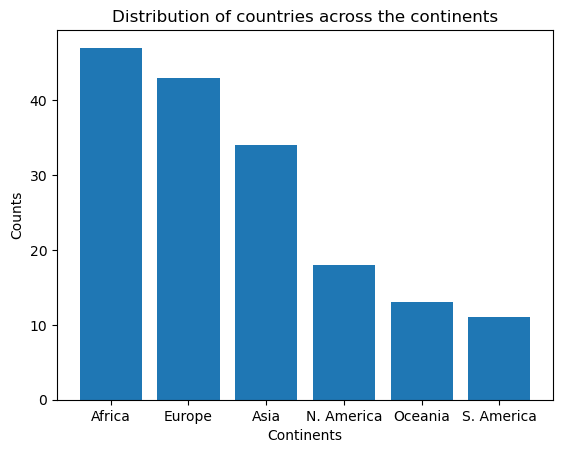

In [4]:
continents = wb["Continent"].value_counts()
plt.bar(continents.index, continents.values)
plt.xlabel("Continents")
plt.ylabel("Counts")
plt.title("Distribution of countries across the continents");

Note that we concluded our call to `plt.bar` with a semicolon (`;`). This suppresses any unnecessary output other than the plot. If we do not include a semicolon, the plot will still generate. However, we will see extraneous text as well:

**`pandas` native plotting:**

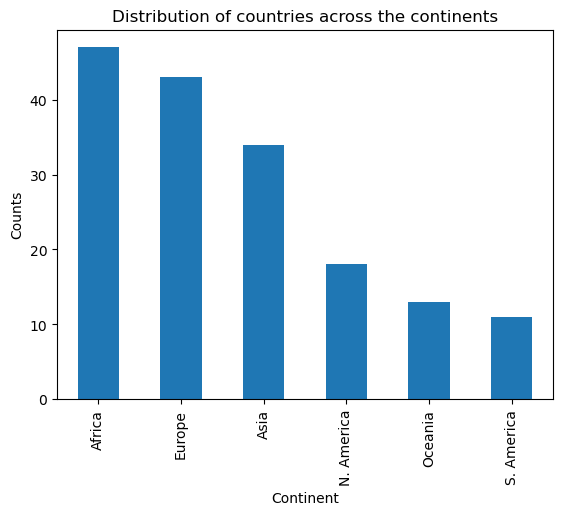

In [5]:
wb["Continent"].value_counts().plot(kind='bar')
plt.ylabel("Counts")
plt.title("Distribution of countries across the continents");

Equivalently, we could use the `countplot` method of the Seaborn library to create our bar plot.

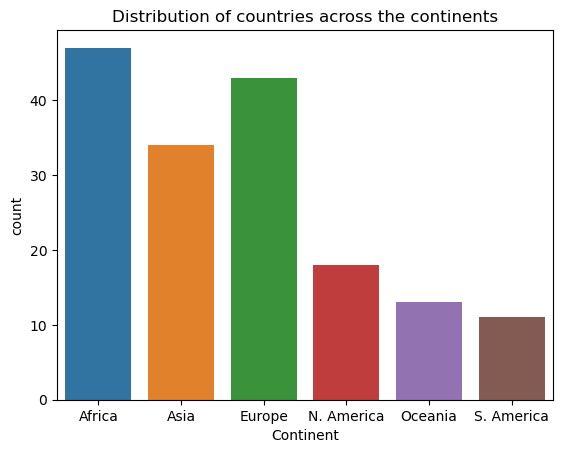

In [6]:
sns.countplot(data=wb, x='Continent')
plt.title("Distribution of countries across the continents");

Above, we said that bar plots should only be used to visualize the distribution of a qualitative (categorical) variable. Why is that? Consider what happens when we try to use `sns.countplot` to visualize a quantitative variable, gross national income per capita.

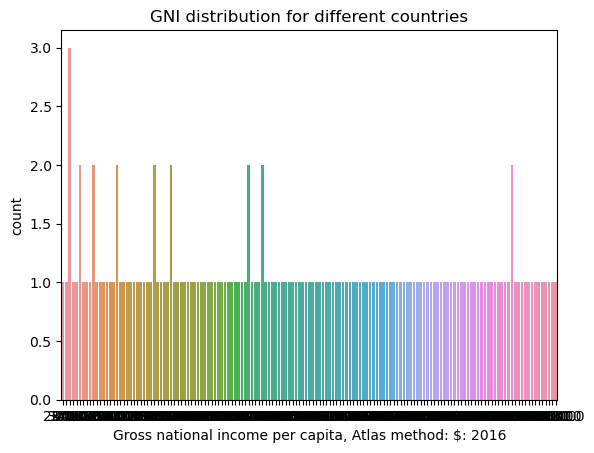

In [7]:
sns.countplot(data=wb, x='Gross national income per capita, Atlas method: $: 2016')
plt.title("GNI distribution for different countries");

What happened? A bar plot (either `plt.bar` or `sns.countplot`) will create a separate bar for *each* unique value of a variable. With a continuous variable, we may not have a finite number of possible values, which can lead to situations where we would need many, many bars to display each unique value. 

To visualize the distribution of a continuous variable, we use a different type of plot:
* Histogram
* Box plot
* Violin plot

## Box Plots and Violin Plots

Box plots and violin plots are two very similar kinds of visualizations. Both display the distribution of a variable using information about quartiles.

In a box plot, the width of the box at any point does not encode meaning. In a violin plot, the width of the plot indicates the *density* of the distribution at each possible value.

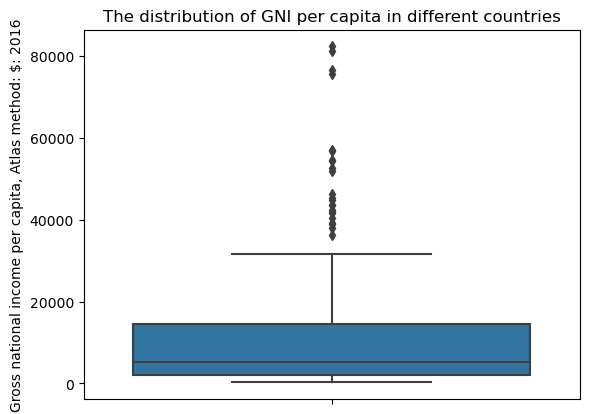

In [8]:
sns.boxplot(data=wb, y="Gross national income per capita, Atlas method: $: 2016")
plt.title("The distribution of GNI per capita in different countries");

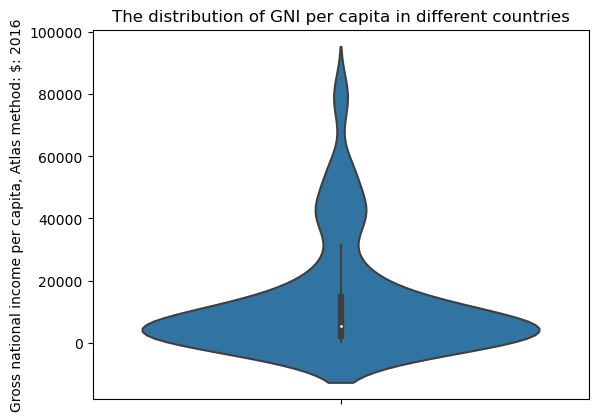

In [9]:
sns.violinplot(data=wb, y="Gross national income per capita, Atlas method: $: 2016")
plt.title("The distribution of GNI per capita in different countries");

A quartile represents a 25% portion of the data. We say that:
* The first quartile (Q1) represents the 25th percentile – 25% of the data lies below the first quartile
* The second quartile (Q2) represents the 50th percentile, also known as the median – 50% of the data lies below the second quartile
* The third quartile (Q3) represents the 75th percentile – 75% of the data lies below the third quartile.

This means that the middle 50% of the data lies *between* the first and third quartiles. This is demonstrated in the histogram below. The three quartiles are marked with red vertical bars.

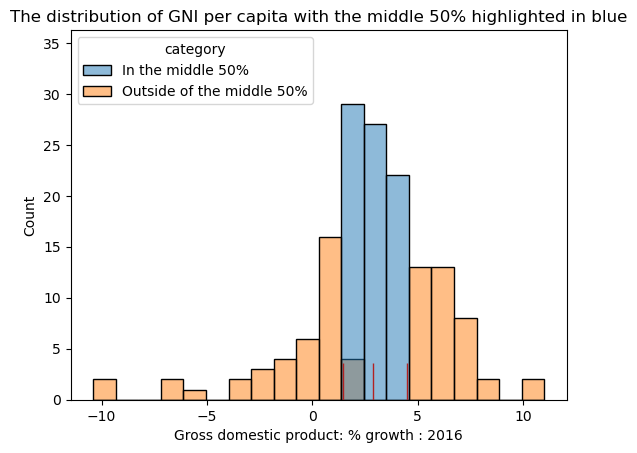

In [10]:
gdp = wb['Gross domestic product: % growth : 2016']
gdp = gdp[~gdp.isna()]

q1, q2, q3 = np.percentile(gdp, [25, 50, 75])

wb_quartiles = wb.copy()
wb_quartiles['category'] = None
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] < q1) | (wb_quartiles['Gross domestic product: % growth : 2016'] > q3), 'category'] = 'Outside of the middle 50%'
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] > q1) & (wb_quartiles['Gross domestic product: % growth : 2016'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(wb_quartiles, x="Gross domestic product: % growth : 2016", hue="category")
sns.rugplot([q1, q2, q3], c="firebrick", lw=6, height=0.1)
plt.title("The distribution of GNI per capita with the middle 50% highlighted in blue");

In a box plot, the lower extent of the box lies at Q1, while the upper extent of the box lies at Q3. The horizontal line in the middle of the box corresponds to Q2 (equivalently, the median).

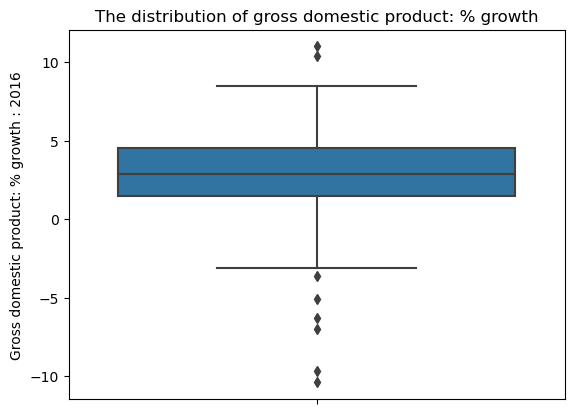

In [11]:
sns.boxplot(data=wb, y='Gross domestic product: % growth : 2016')
plt.title("The distribution of gross domestic product: % growth");

A violin plot display quartile information, albeit a bit more subtly. Look closely at the center vertical bar of the violin plot below!

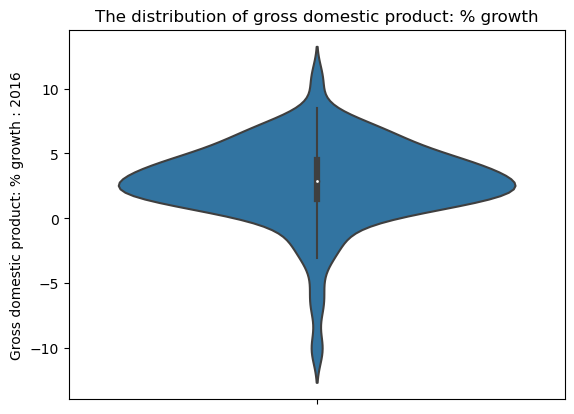

In [12]:
sns.violinplot(data=wb, y='Gross domestic product: % growth : 2016')
plt.title("The distribution of gross domestic product: % growth");

Plotting side-by-side box or violin plots allows us to compare distributions across different categories. In other words, they enable us to plot *both* a qualitative variable and a quantitative continuous variable in one visualization.

Seaborn allows us to easily create side-by-side plots by specifying both an `x` and `y` column.

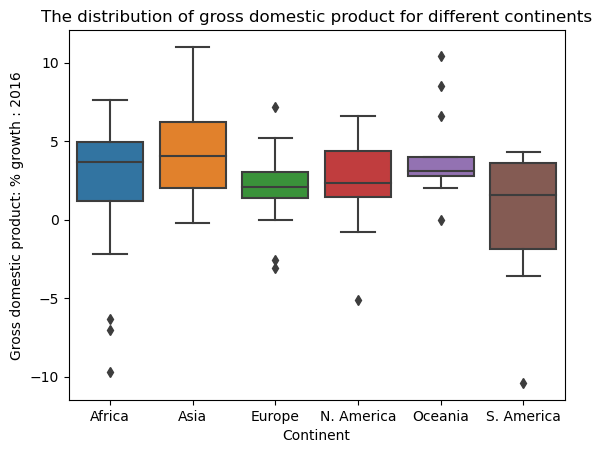

In [13]:
sns.boxplot(data=wb, x="Continent", y='Gross domestic product: % growth : 2016')
plt.title("The distribution of gross domestic product for different continents");

## Histograms

You are likely familiar with histograms from Data 8. A histogram collects continuous data into bins, then plots this binned data. Each bin reflects the density of datapoints with values that lie between the left and right ends of the bin.

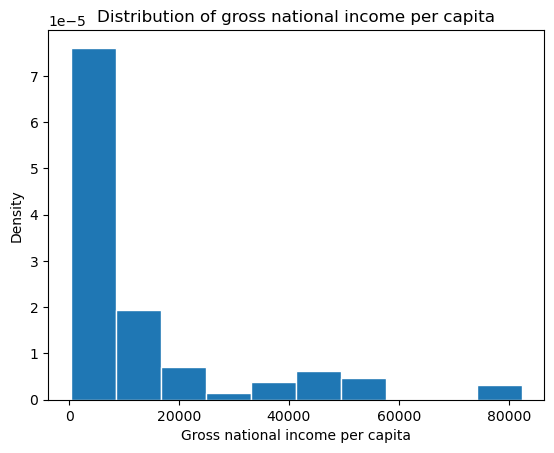

In [14]:
# The `edgecolor` argument controls the color of the bin edges
gni = wb["Gross national income per capita, Atlas method: $: 2016"]
plt.hist(gni, density=True, edgecolor="white")

# Add labels
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
plt.title("Distribution of gross national income per capita");

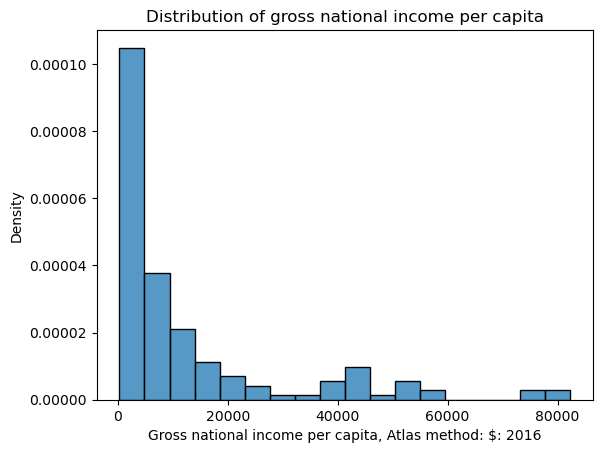

In [15]:
sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", stat="density")
plt.title("Distribution of gross national income per capita");

We can overlay histograms (or density curves) to compare distributions across qualitative categories.

The `hue` parameter of `sns.histplot` specifies the column that should be used to determine the color of each category. `hue` can be used in many Seaborn plotting functions.

Notice that the resulting plot includes a legend describing which color corresponds to each hemisphere – a legend should always be included if color is used to encode information in a visualization!

In [16]:
# Create a new variable to store the hemisphere in which each country is located
north = ["Asia", "Europe", "N. America"]
south = ["Africa", "Oceania", "S. America"]
wb.loc[wb["Continent"].isin(north), "Hemisphere"] = "Northern"
wb.loc[wb["Continent"].isin(south), "Hemisphere"] = "Southern"

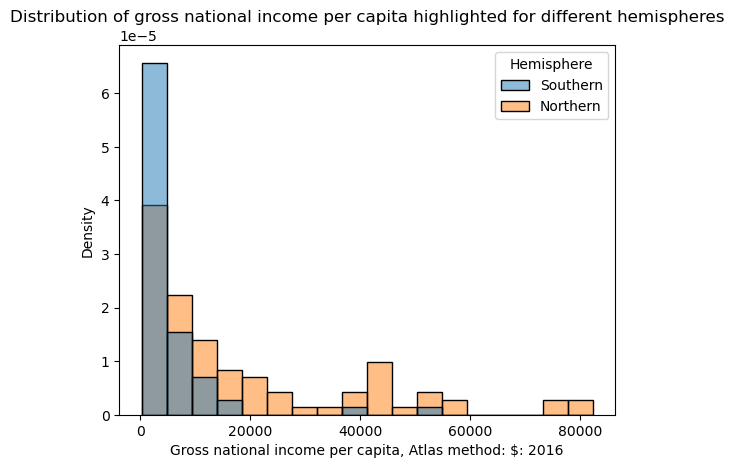

In [17]:
sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", hue="Hemisphere", stat="density")
plt.title("Distribution of gross national income per capita highlighted for different hemispheres");

Each bin of a histogram is scaled such that its area is equal to the percentage of all datapoints that it contains.

First bin has width 16410.0 and height 4.7741589911386953e-05
This corresponds to 16410.0 * 4.7741589911386953e-05 = 78.343949044586% of the data


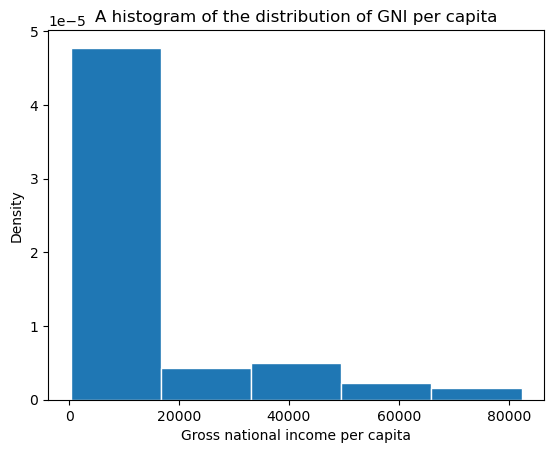

In [18]:
densities, bins, _ = plt.hist(gni, density=True, edgecolor="white", bins=5)
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
plt.title("A histogram of the distribution of GNI per capita");

print(f"First bin has width {bins[1]-bins[0]} and height {densities[0]}")
print(f"This corresponds to {bins[1]-bins[0]} * {densities[0]} = {(bins[1]-bins[0])*densities[0]*100}% of the data")

In Data 100, we describe a "mode" of a histogram as a peak in the distribution. Often, however, it is difficult to determine what counts as its own "peak." For example, the number of peaks in the distribution of HIV rates across different countries varies depending on the number of histogram bins we plot. 

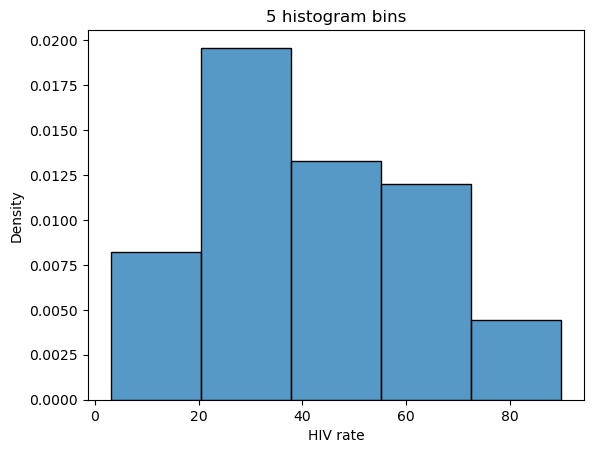

In [19]:
# Rename the very long column name for convenience
wb = wb.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':"HIV rate"})

# With 5 bins, it seems that there is only one peak
sns.histplot(data=wb, x="HIV rate", stat="density", bins=5)
plt.title("5 histogram bins");

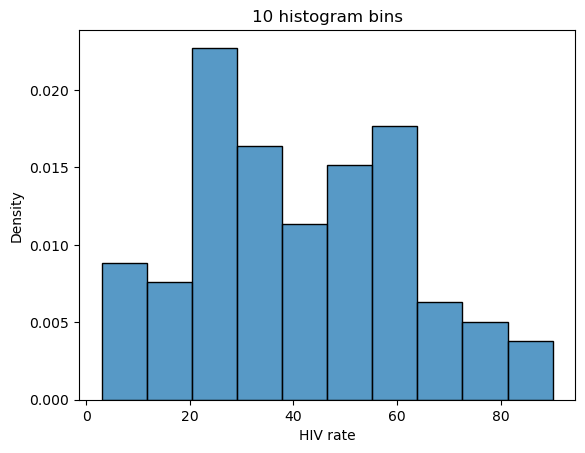

In [20]:
# With 10 bins, there seem to be two peaks

sns.histplot(data=wb, x="HIV rate", stat="density", bins=10)
plt.title("10 histogram bins");

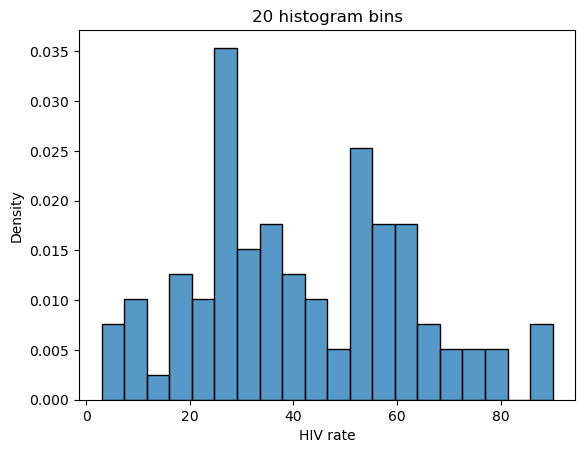

In [21]:
# And with 20 bins, it becomes hard to say what counts as a "peak"!

sns.histplot(data=wb, x ="HIV rate", stat="density", bins=20)
plt.title("20 histogram bins");

As this example illustrates, it is sometimes more useful to understand the general structure of our data, rather than focus on individual observations. Kernel density estimation helps with this goal.

## Kernel Density Estimation

Kernel density estimation (KDE) allows us to "smooth" a distribution to display general trends and eliminate noisy, distracting detail.

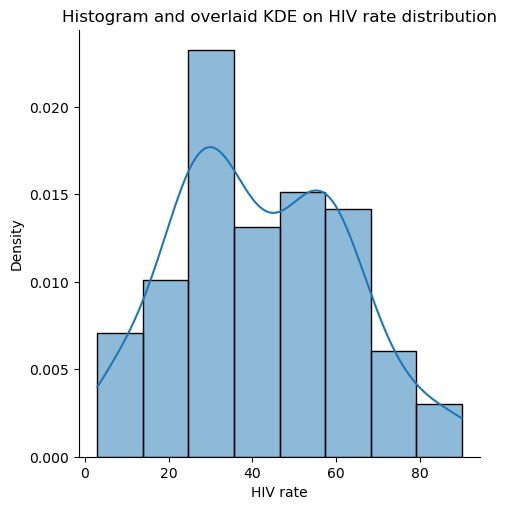

In [22]:
# The smooth curve overlaid on the histogram is a KDE
sns.displot(data=wb, x="HIV rate", kde=True, stat="density")
plt.title("Histogram and overlaid KDE on HIV rate distribution");

To illustrate the process of constructing a KDE curve, we'll use a fake dataset of just five datapoints, contained in the list `points`.

In [23]:
points = [2.2, 2.8, 3.7, 5.3, 5.7]

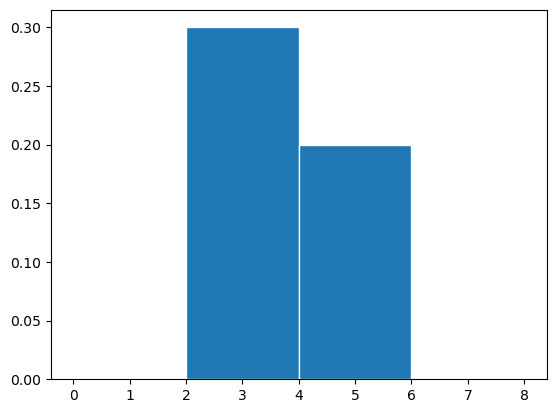

In [24]:
plt.hist(points, bins=range(0, 10, 2), ec='w', density=True);

Let's define some **kernels**. We will explain these formulas momentarily. We'll also define some helper functions for visualization purposes.

In [25]:
def gaussian(x, z, a):
    # Gaussian kernel
    return (1/np.sqrt(2*np.pi*a**2)) * np.exp((-(x - z)**2 / (2 * a**2)))

def boxcar_basic(x, z, a):
    # Boxcar kernel
    if np.abs(x - z) <= a/2:
        return 1/a
    return 0

def boxcar(x, z, a):
    # Boxcar kernel
    cond = np.abs(x - z)
    return np.piecewise(x, [cond <= a/2, cond > a/2], [1/a, 0] )

In [26]:
def create_kde(kernel, pts, a):
    # Takes in a kernel, set of points, and alpha
    # Returns the KDE as a function
    def f(x):
        output = 0
        for pt in pts:
            output += kernel(x, pt, a)
        return output / len(pts) # Normalization factor
    return f

def plot_kde(kernel, pts, a):
    # Calls create_kde and plots the corresponding KDE
    f = create_kde(kernel, pts, a)
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    y = [f(xi) for xi in x]
    fig, ax = plt.subplots()
    ax.plot(x, y)
    return fig, ax
    
def plot_separate_kernels(kernel, pts, a, norm=False):
    # Plots individual kernels, which are then summed to create the KDE
    fig, ax = plt.subplots()
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    for pt in pts:
        y = kernel(x, pt, a)
        if norm:
            y /= len(pts)
        ax.plot(x, y)
    return fig, ax

Here are our five points represented as vertical bars.

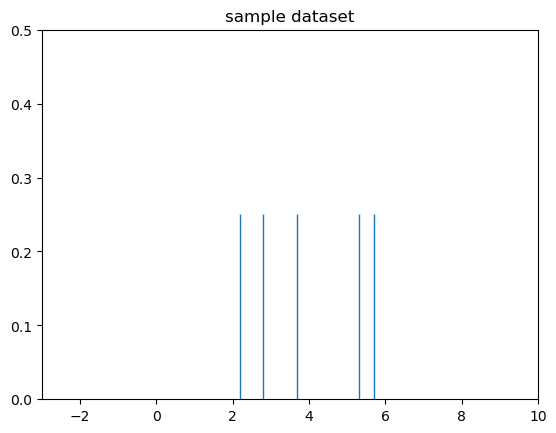

In [27]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
sns.rugplot(points, height = 0.5)
plt.title("sample dataset");

### Step 1: Place a kernel at each point

We'll start with the Gaussian kernel.

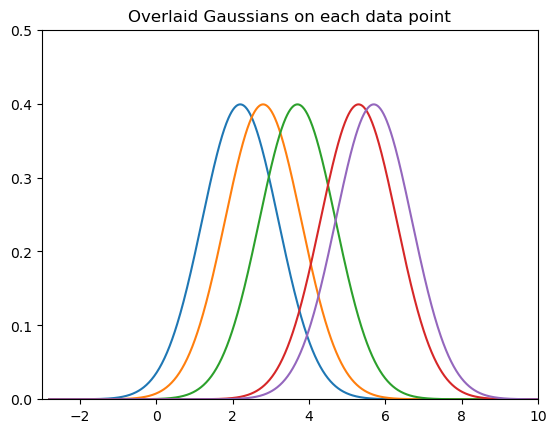

In [28]:
fig, ax = plot_separate_kernels(gaussian, points, a=1)
ax.set_title("Overlaid Gaussians on each data point")
ax.set_xlim(-3, 10)
ax.set_ylim(0, 0.5);

### Step 2: Normalize kernels so that total area is 1

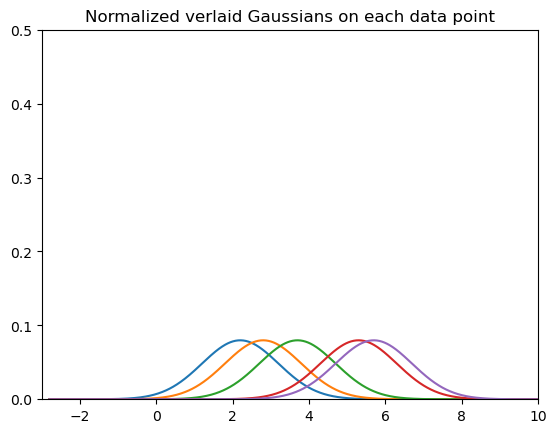

In [29]:
fig, ax = plot_separate_kernels(gaussian, points, a=1, norm=True)
ax.set_title("Normalized verlaid Gaussians on each data point")
ax.set_xlim(-3, 10)
ax.set_ylim(0, 0.5);

### Step 3: Sum all kernels together

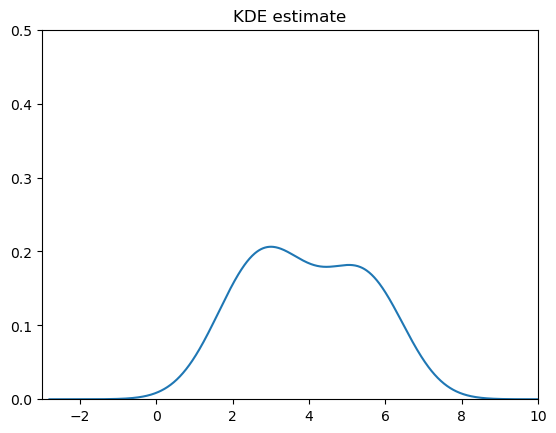

In [30]:
fig, ax = plot_kde(gaussian, points, a=1)
ax.set_title("KDE estimate")
ax.set_xlim(-3, 10)
ax.set_ylim(0, 0.5);

This looks identical to the smooth curve that `sns.distplot` gives us (when we set the appropriate parameter):

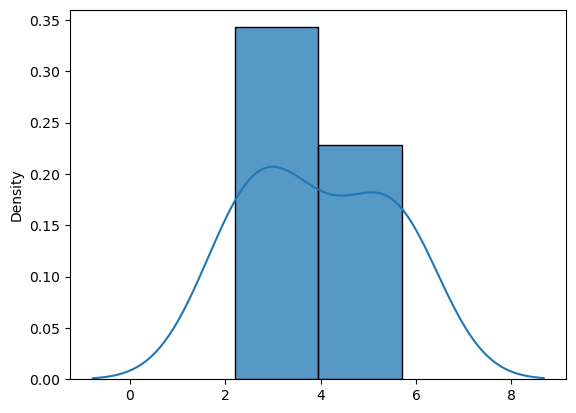

In [31]:
sns.kdeplot(points, bw_method=0.65)  # magic value!
sns.histplot(points, stat='density', bins=2);

You can also get a very similar result in a single call by requesting the KDE be added to the histogram, with `kde=True` and some extra keywords:

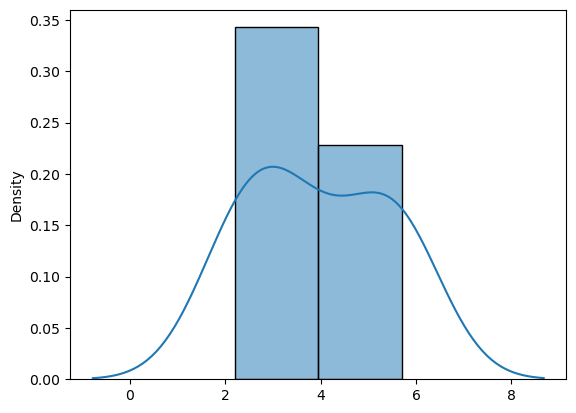

In [32]:
sns.histplot(points, bins=2, kde=True, stat='density', 
             kde_kws=dict(cut=3, bw_method=0.65));

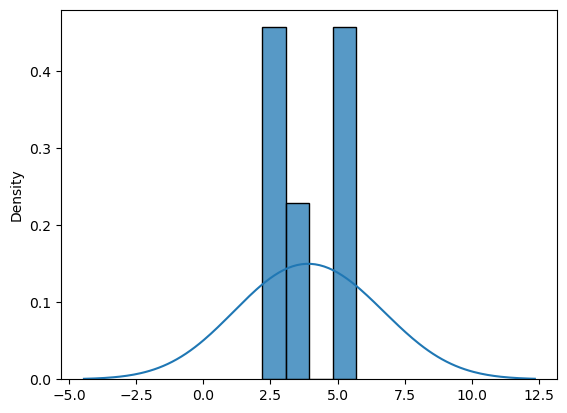

In [33]:
sns.kdeplot(points, bw_adjust=2)
sns.histplot(points, stat='density');

## Kernels

**Gaussian**

$$K_{\alpha}(x, x_i) = \frac{1}{\sqrt{2 \pi \alpha^2}} e^{-\frac{(x - x_i)^2}{2\alpha^2}}$$


**Boxcar**


$$K_{\alpha}(x, x_i) = \begin {cases}
			\frac{1}{\alpha}, \: \: \: |x - x_i| \leq \frac{\alpha}{2}\\
			0, \: \: \: \text{else}
			\end{cases}$$

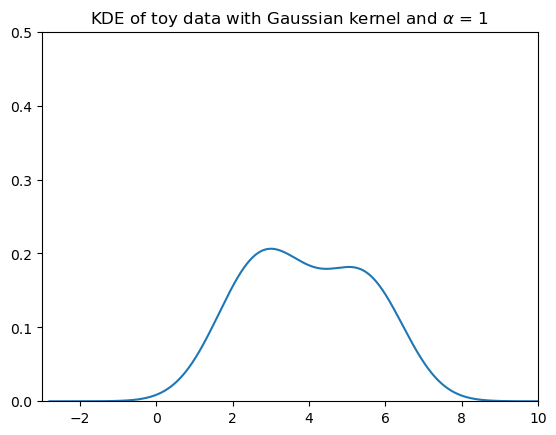

In [34]:
fig, ax = plot_kde(gaussian, points, a=1)
ax.set_title(r'KDE of toy data with Gaussian kernel and $\alpha$ = 1')
ax.set_xlim(-3, 10)
ax.set_ylim(0, 0.5);

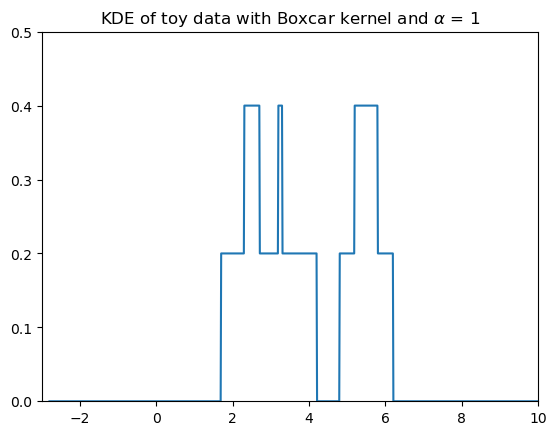

In [35]:
fig, ax = plot_kde(boxcar, points, a=1)
ax.set_title(r'KDE of toy data with Boxcar kernel and $\alpha$ = 1')
ax.set_xlim(-3, 10)
ax.set_ylim(0, 0.5);

## Effect of bandwidth hyperparameter $\alpha$

Let's bring in some (different) toy data.

In [36]:
tips = sns.load_dataset('tips')

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
vals = tips['total_bill']

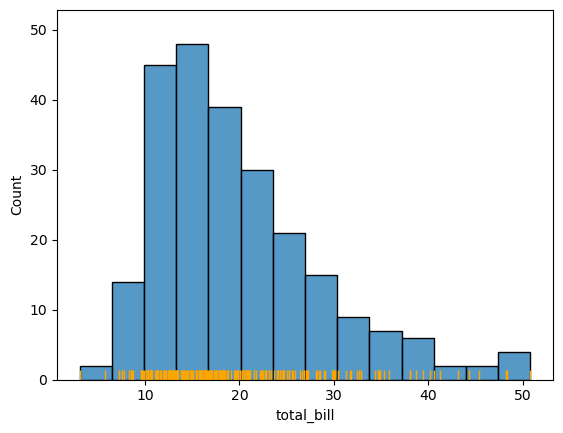

In [39]:
ax = sns.histplot(vals)
sns.rugplot(vals, color='orange', ax=ax);

### KDE Formula

$$f_{\alpha}(x) = \sum_{i = 1}^n \frac{1}{n} \cdot K_{\alpha}(x, x_i) =  \frac{1}{n} \sum_{i = 1}^n K_{\alpha}(x, x_i)$$

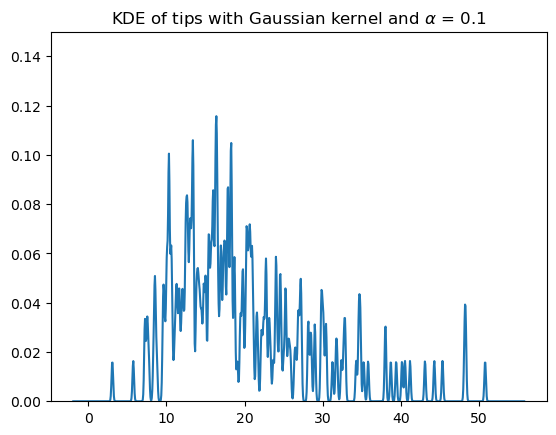

In [40]:
fig, ax = plot_kde(gaussian, vals, a=0.1)
ax.set_title(r'KDE of tips with Gaussian kernel and $\alpha$ = 0.1')
plt.ylim(0, 0.15);

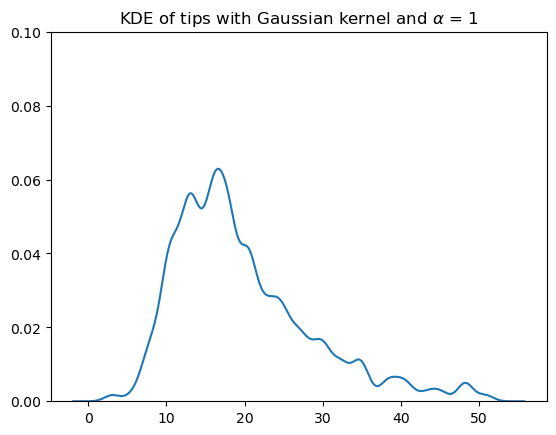

In [41]:
fig, ax = plot_kde(gaussian, vals, a=1)
ax.set_title(r'KDE of tips with Gaussian kernel and $\alpha$ = 1')
ax.set_ylim(0, 0.1);

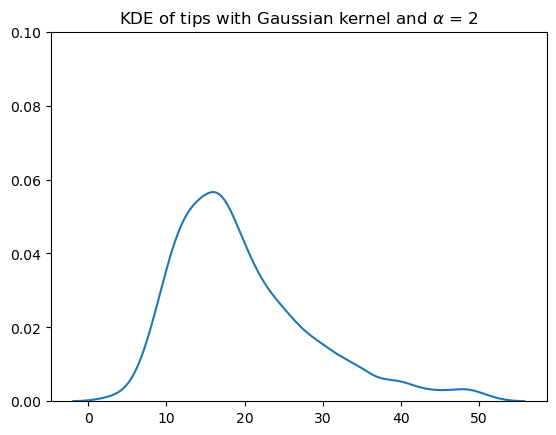

In [42]:
fig, ax = plot_kde(gaussian, vals, a=2)
ax.set_title(r'KDE of tips with Gaussian kernel and $\alpha$ = 2')
ax.set_ylim(0, 0.1);

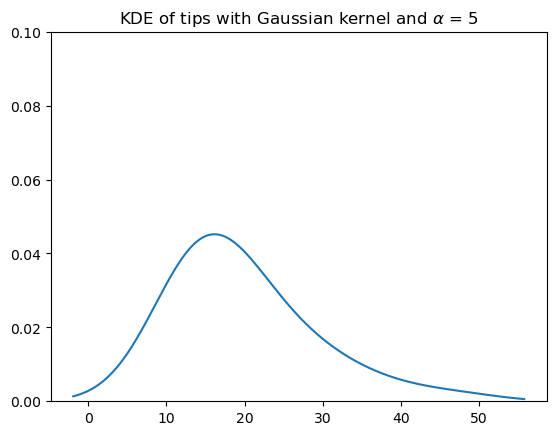

In [43]:
fig, ax = plot_kde(gaussian, vals, a=5)
ax.set_title(r'KDE of tips with Gaussian kernel and $\alpha$ = 5')
ax.set_ylim(0, 0.1);